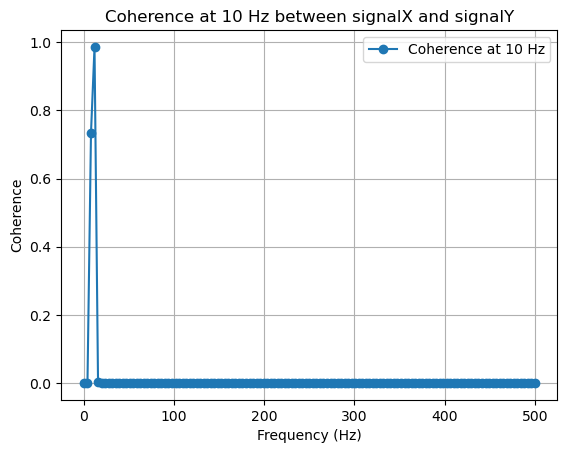

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second of data)
n = 100  # Number of trials

# Generate two signals
f1 = 10  # Frequency of the first signal (Hz)
f2 = 10  # Frequency of the second signal (Hz)

# Generate signalX and signalY as sine waves with some added noise
signalX = np.sin(2 * np.pi * f1 * t) + 0.5 * np.random.randn(len(t))
signalY = np.sin(2 * np.pi * f2 * t) + 0.5 * np.random.randn(len(t))

# Create trials of signalX and signalY
signalX_trials = np.tile(signalX, (n, 1))
signalY_trials = np.tile(signalY, (n, 1))

# Compute Welch's method for cross-power spectral density
frequencies, Pxy = signal.csd(signalX_trials, signalY_trials, fs=fs, nperseg=256)

# Compute Welch's method for power spectral density
freqs, Pxx = signal.welch(signalX_trials, fs=fs, nperseg=256)
freqs, Pyy = signal.welch(signalY_trials, fs=fs, nperseg=256)

# Average over trials
Pxx_avg = np.mean(Pxx, axis=0)
Pyy_avg = np.mean(Pyy, axis=0)

# Calculate coherence
coh = np.abs(Pxy)**2 / (Pxx_avg * Pyy_avg)
freq_of_interest = 10  # Frequency of interest in Hz
idx = np.argmin(np.abs(frequencies - freq_of_interest))

# Calculate coherence at the frequency of interest
coh_at_freq = np.abs(Pxy[idx])**2 / (Pxx_avg[idx] * Pyy_avg[idx])

# Plot coherence
plt.figure()
plt.plot(freqs, coh_at_freq, 'o-', label=f'Coherence at {freq_of_interest} Hz')
plt.title(f'Coherence at {freq_of_interest} Hz between signalX and signalY')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second of data)
n = 100  # Number of trials

# Generate two signals
f1 = 10  # Frequency of the first signal (Hz)
f2 = 10  # Frequency of the second signal (Hz)

# Generate signalX and signalY as sine waves with some added noise
signalX = np.sin(2 * np.pi * f1 * t) + 0.5 * np.random.randn(len(t))
signalY = np.sin(2 * np.pi * f2 * t) + 0.5 * np.random.randn(len(t))

# Initialize coherence array
coh_per_time = np.zeros(len(t))

# Compute coherence at each time point
for i in range(len(t)):
    # Generate trials of signalX and signalY for this time point
    signalX_trial = signalX[i] + 0.5 * np.random.randn(n)
    signalY_trial = signalY[i] + 0.5 * np.random.randn(n)

    # Compute cross-power spectral density using Welch's method
    f, Pxy = signal.csd(signalX_trial, signalY_trial, fs=fs, nperseg=256)

    # Compute power spectral densities using Welch's method
    freqs, Pxx = signal.welch(signalX_trial, fs=fs, nperseg=256)
    freqs, Pyy = signal.welch(signalY_trial, fs=fs, nperseg=256)

    # Average over trials
    Pxx_avg = np.mean(np.abs(Pxx)**2)
    Pyy_avg = np.mean(np.abs(Pyy)**2)

    # Calculate coherence at this time point
    coh_per_time[i] = np.abs(Pxy)**2 / (Pxx_avg * Pyy_avg)

# Plot coherence over time
plt.figure()
plt.plot(t, coh_per_time)
plt.title('Coherence over time between signalX and signalY')
plt.xlabel('Time (s)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence.

In [4]:
Pxy

array([ 9.43876249e-06+0.00000000e+00j,  2.35381921e-04+2.32015528e-04j,
       -1.34309516e-04+7.19635259e-05j, -2.90631419e-04+1.18708604e-04j,
       -3.31472656e-04+3.04043181e-04j,  1.53348139e-04+1.58775045e-04j,
        1.68914897e-04+3.81149806e-05j, -4.59187706e-04+7.05968492e-05j,
       -1.68722653e-04+3.02992713e-04j, -1.23459040e-04+2.14799944e-04j,
       -1.99028434e-04+2.17717570e-04j, -5.93328747e-04+6.37244502e-04j,
        1.92064372e-04+9.40793891e-04j,  7.33118375e-04+1.07197919e-03j,
       -1.51289852e-04+5.49249561e-04j, -3.33724930e-04+1.36427489e-04j,
       -1.19144484e-04+1.66206422e-04j,  1.23686237e-04+1.31789537e-04j,
       -2.58773034e-04-4.93019074e-05j, -2.89640250e-04+5.77382130e-04j,
        3.99343421e-04-7.03360936e-05j, -1.78682101e-04-2.30429868e-04j,
        8.91103136e-05+8.09820823e-05j, -1.88922173e-04+1.34763202e-04j,
        2.19670668e-04+1.13969444e-03j,  1.62029380e-04+6.01794528e-05j,
        1.11324676e-04+1.97159532e-04j, -2.20485359

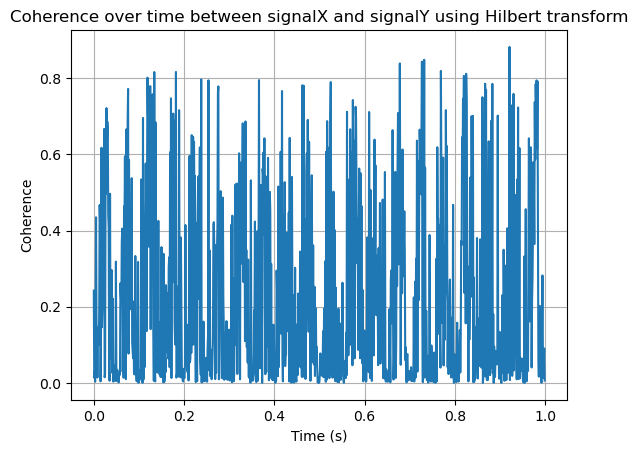

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second of data)
n = 100  # Number of trials

# Generate two signals
f1 = 10  # Frequency of the first signal (Hz)
f2 = 10  # Frequency of the second signal (Hz)

# Generate signalX and signalY as sine waves with some added noise
signalX = np.sin(2 * np.pi * f1 * t) + 0.5 * np.random.randn(len(t))
signalY = np.sin(2 * np.pi * f2 * t) + 0.5 * np.random.randn(len(t))

# Initialize coherence array
coh_per_time = np.zeros(len(t))

# Compute coherence at each time point
for i in range(len(t)):
    # Generate trials of signalX and signalY for this time point
    signalX_trial = signalX[i] + 0.5 * np.random.randn(n)
    signalY_trial = signalY[i] + 0.5 * np.random.randn(n)

    # Compute Hilbert transform to get instantaneous phase and amplitude
    signalXh = signal.hilbert(signalX_trial)
    signalYh = signal.hilbert(signalY_trial)

    phaseX = np.angle(signalXh)
    phaseY = np.angle(signalYh)

    # Compute coherence using phase difference
    phase_diff = phaseX - phaseY
    coh_per_time[i] = np.abs(np.mean(np.exp(1j * phase_diff))) ** 2

# Plot coherence over time
plt.figure()
plt.plot(t, coh_per_time)
plt.title('Coherence over time between signalX and signalY using Hilbert transform')
plt.xlabel('Time (s)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()


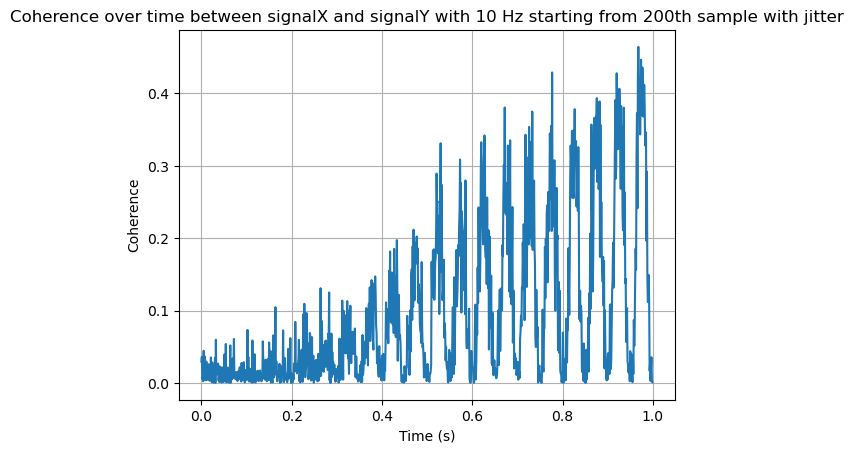

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second of data)
n = 100  # Number of trials

# Generate two signals with 10 Hz sine waves starting from the 200th sample with random jitter
start_sample = 200
jitter = 1000 * np.random.rand(n)  # Random jitter for starting point

# Generate signalX and signalY as sine waves with some added noise
signalX = np.zeros((n, len(t)))
signalY = np.zeros((n, len(t)))

for i in range(n):
    start_idx = start_sample + int(jitter[i])
    signalX[i, start_idx:] = np.sin(2 * np.pi * 10 * t[start_idx:])
    signalY[i, start_idx:] = np.sin(2 * np.pi * 10 * t[start_idx:])

    # Add noise to signalX and signalY
    signalX[i, :] += 0.5 * np.random.randn(len(t))
    signalY[i, :] += 0.5 * np.random.randn(len(t))

# Initialize coherence array
coh_per_time = np.zeros(len(t))

# Compute coherence at each time point
for i in range(len(t)):
    # Compute Hilbert transform to get instantaneous phase and amplitude
    signalXh = signal.hilbert(signalX[:, i])
    signalYh = signal.hilbert(signalY[:, i])

    phaseX = np.angle(signalXh)
    phaseY = np.angle(signalYh)

    # Compute phase difference
    phase_diff = phaseX - phaseY

    # Compute coherence using phase difference
    coh_per_time[i] = np.abs(np.mean(np.exp(1j * phase_diff))) ** 2

# Plot coherence over time
plt.figure()
plt.plot(t, coh_per_time)
plt.title('Coherence over time between signalX and signalY with 10 Hz starting from 200th sample with jitter')
plt.xlabel('Time (s)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()


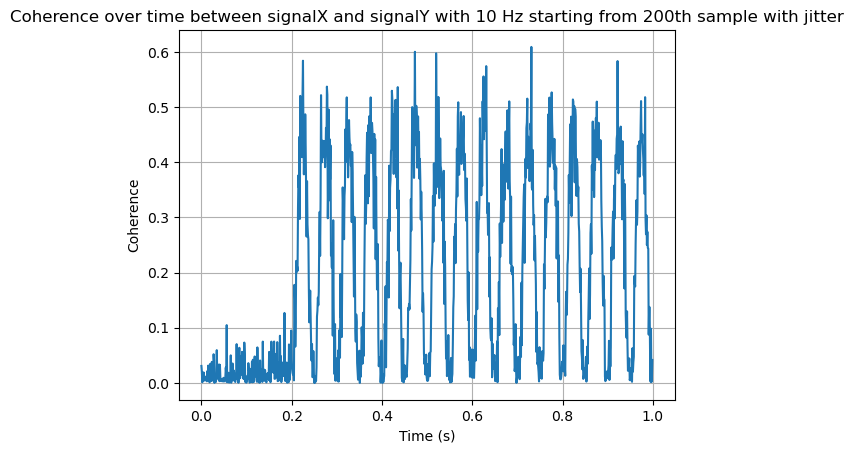

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define sampling parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second of data)
n = 100  # Number of trials

# Generate two signals with 10 Hz sine waves starting from the 200th sample with random jitter
start_sample = 200
jitter = 10 * np.random.rand(n)  # Random jitter for starting point

# Generate signalX and signalY as sine waves with some added noise
signalX = np.zeros((n, len(t)))
signalY = np.zeros((n, len(t)))

for i in range(n):
    start_idx = start_sample + int(jitter[i])
    signalX[i, start_idx:] = np.sin(2 * np.pi * 10 * t[start_idx:])
    signalY[i, start_idx:] = np.sin(2 * np.pi * 10 * t[start_idx:])

    # Add noise to signalX and signalY
    signalX[i, :] += 0.5 * np.random.randn(len(t))
    signalY[i, :] += 0.5 * np.random.randn(len(t))

# Initialize coherence array
coh_per_time = np.zeros(len(t))

# Compute coherence at each time point
for i in range(len(t)):
    # Compute Hilbert transform to get instantaneous phase and amplitude
    signalXh = signal.hilbert(signalX[:, i])
    signalYh = signal.hilbert(signalY[:, i])

    # Compute magnitude
    mX = np.abs(signalXh)
    mY = np.abs(signalYh)

    phaseX = np.angle(signalXh)
    phaseY = np.angle(signalYh)

    # Compute phase difference
    phase_diff = phaseX - phaseY

    # Compute coherence using phase difference and magnitude
    coh_per_time[i] = np.abs(np.mean(mX * mY * np.exp(1j * phase_diff))) ** 2 / \
                      (np.mean(mX ** 2) * np.mean(mY ** 2))

# Plot coherence over time
plt.figure()
plt.plot(t, coh_per_time)
plt.title('Coherence over time between signalX and signalY with 10 Hz starting from 200th sample with jitter')
plt.xlabel('Time (s)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()
